# Compare multi fitted atmospheric parameters with MERRA2

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : March 9th 2023
- last update : March 9th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## MERRA2

In [5]:
path_merra2="data/merra2"
files_merra2=["MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv","MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"]

In [6]:
all_merra2 = []
for file in files_merra2:
    merra2 = pd.read_csv(os.path.join(path_merra2,file))
    all_merra2.append(merra2)

In [7]:
merra2 = pd.concat(all_merra2,axis=0)

In [8]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
pwv_merra2 = merra2['TQV']
oz_merra2 = merra2['TO3']

Text(0.5, 1.0, 'precipitable water vapor in MERRA2 in 2022 and 2023')

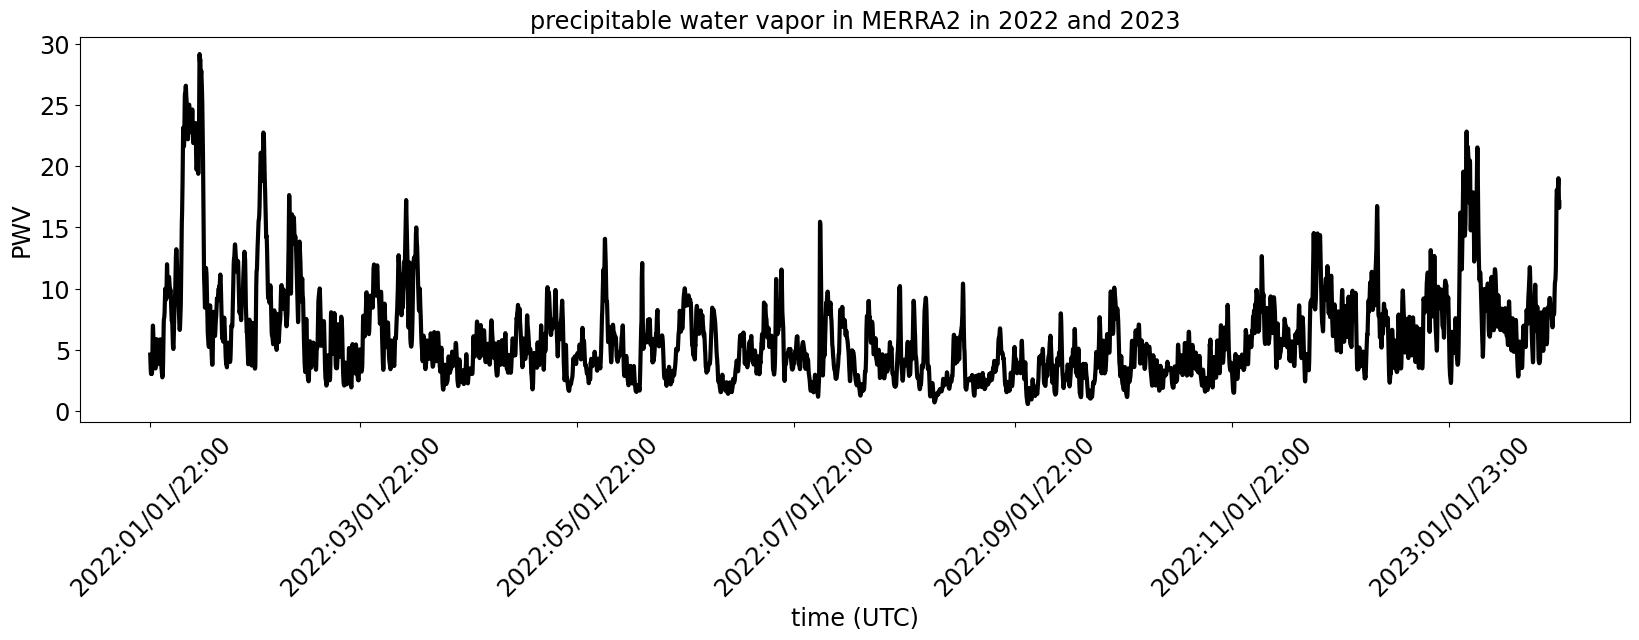

In [9]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,pwv_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("PWV")
ax.set_title('precipitable water vapor in MERRA2 in 2022 and 2023')

In [10]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
oz_merra2 = merra2['TO3']

(0.0, 600.0)

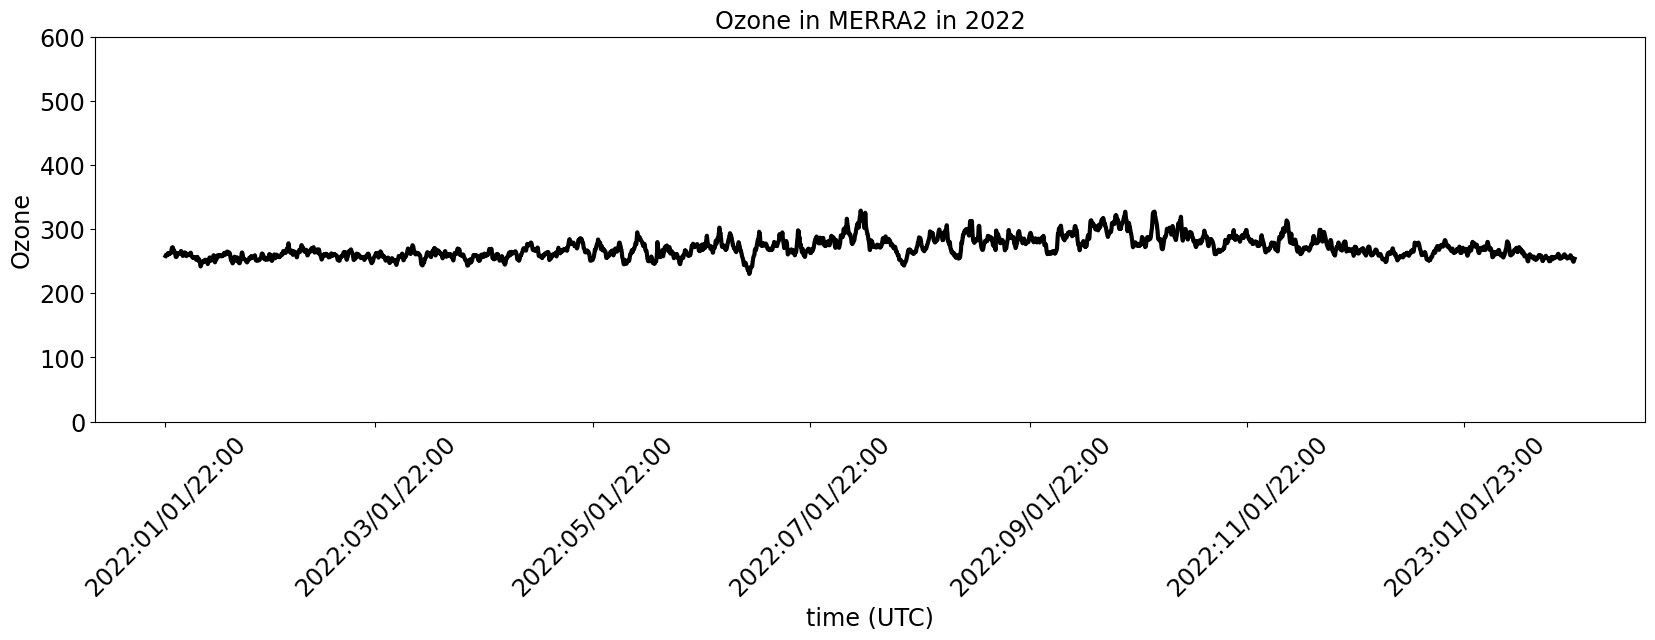

In [11]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,oz_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("Ozone")
ax.set_title('Ozone in MERRA2 in 2022')
ax.set_ylim(0,600)

## Data

In [12]:
DATE="2023 01 (17,18,19) and 2022/03/17 and 2022/06 (29,30)"
#DATE="2022/03/17 and 2022/06 (29,30)"

In [13]:
FLAG_SELECT_POLAR = False
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [14]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [15]:
path_out = "dataout/fitparamatm"

In [16]:
filenames = [
"multifitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2022-03-17-empty~holo4_003-psf2dffm-rebin2.csv",
"multifitparamatm-2022-06-29-empty~holo4_003-psf2dffm-rebin2.csv", 
"multifitparamatm-2022-06-30-empty~holo4_003-psf2dffm-rebin2.csv",    
#"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv",
]

In [17]:
NDAYS = 3
tags = ["OG550 23/01/17", "OG550 23/01/18", "OG550 23/01/19", "No Filt 23/01/17", "NoFilt 23/01/18", "NoFilt 23/01/19",
       "No fit 2022/03/17","No fit 2022/06/29","No fit 2022/06/30"]

#tags = ["2022/03/17","2022/06/29","2022/06/30"]

In [18]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename))
    df=df.dropna(axis=0)
    
    if FLAG_SELECT_POLAR:
        df = df[df["object"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [19]:
NF =len(all_df)

In [20]:
all_df[0].head()

Unnamed: 0  number    object                         dateobs   refhour  \
0           0     253  HD185975  2023-01-18T03:08:52.415500962Z -1.943737   
1           1     269   HD38666  2023-01-18T03:21:14.695994415Z -1.737548   
2           2     270   HD38666  2023-01-18T03:21:57.571002150Z -1.725638   
3           3     279   HD38666  2023-01-18T03:27:10.165993443Z -1.638806   
4           4     280   HD38666  2023-01-18T03:27:52.980498634Z -1.626913   

    airmass  pressure  temperature  humidity       filename  ...   egrey_3  \
0  2.111228         0            0         0  2023011700253  ...  0.001282   
1  1.011768         0            0         0  2023011700269  ...  0.000283   
2  1.012175         0            0         0  2023011700270  ...  0.000244   
3  1.015372         0            0         0  2023011700279  ...  0.000231   
4  1.015841         0            0         0  2023011700280  ...  0.000291   

      SNR_3     chi2_4     pwv_4    grey_4    epwv_4   egrey_4     SNR_4  \
0  0.001830   6.252164  3.373353  1.013166  0.150339  0.001281  0.047650   
1  0.075839  18.576419  3.550935  1.026247  0.054363  0.000250  0.024055   
2  0.098993  53.383568  3.326029  1.015661  0.045764  0.000214  0.049850   
3  0.068494  33.766977  3.059429  1.025985  0.043017  0.000203  0.010321   
4  0.067267  19.594017  3.450047  1.026378  0.053785  0.000255  0.018607   

    pwv_avg   pwv_sig  
0  2.961447  0.265350  
1  3.488531  0.212568  
2  3.720334  0.215382  
3  3.170198  0.105023  
4  3.418016  0.113220  

[5 rows x 42 columns]

In [21]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_40194/843904698.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


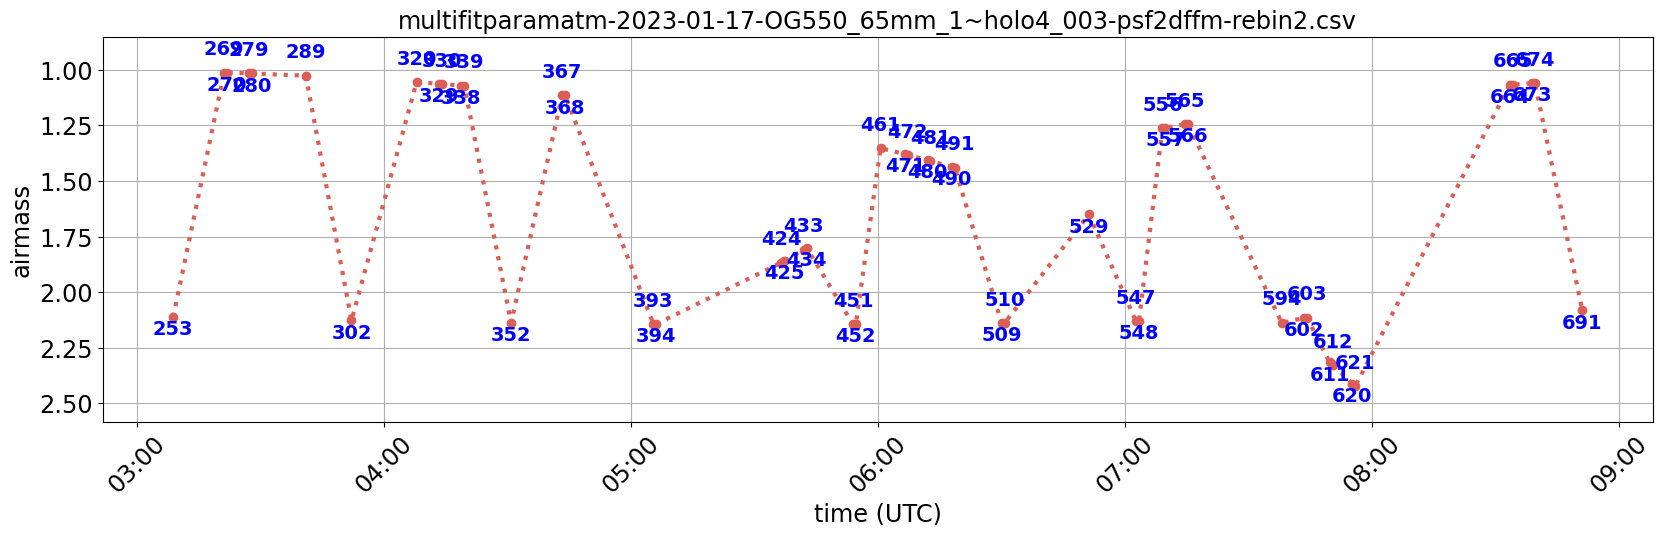

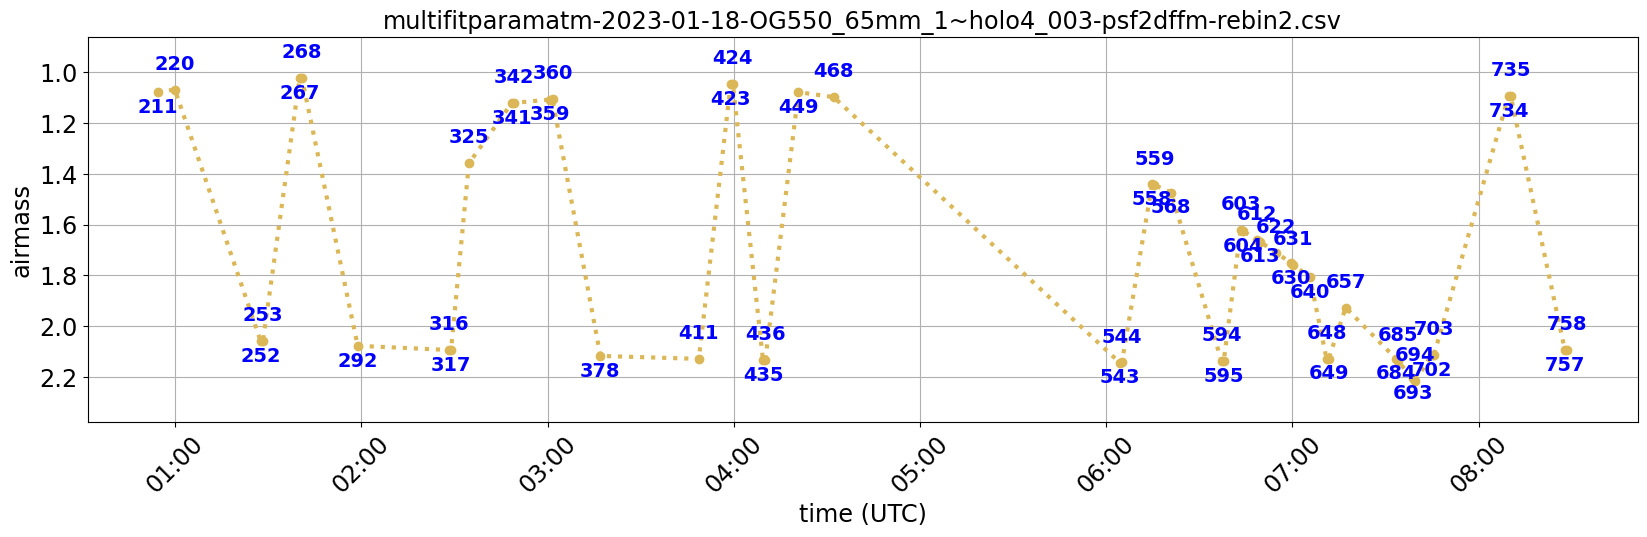

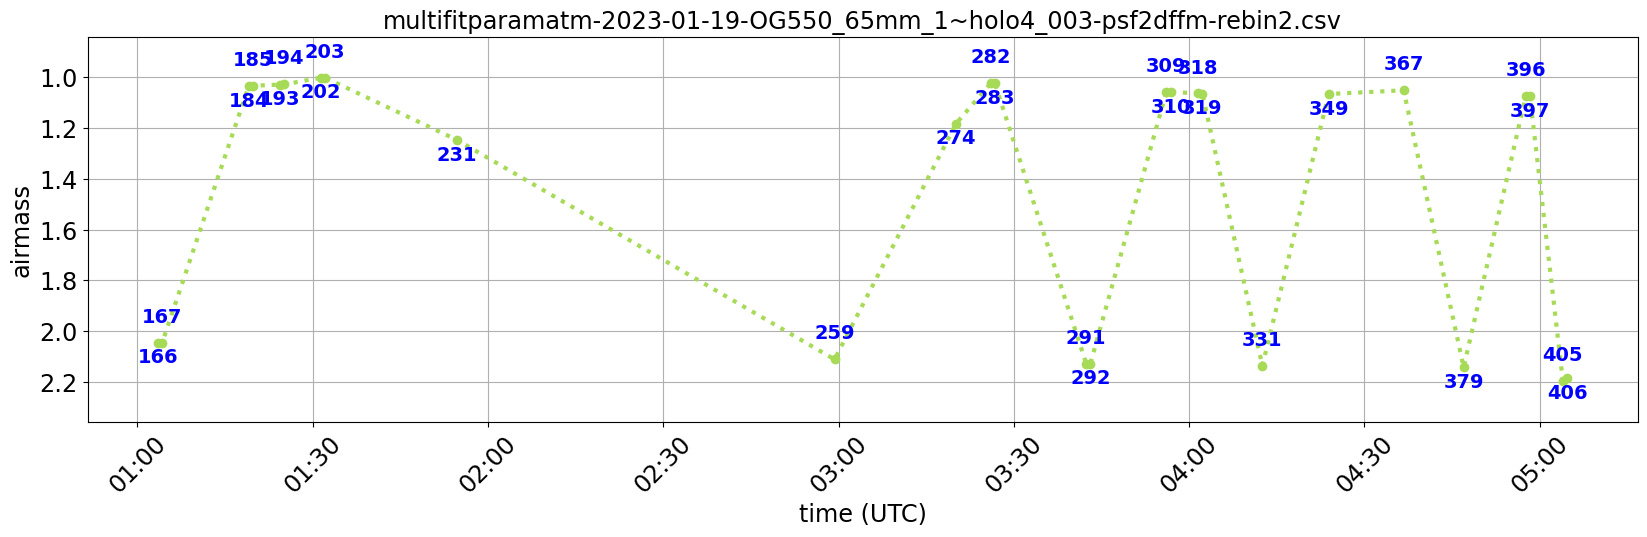

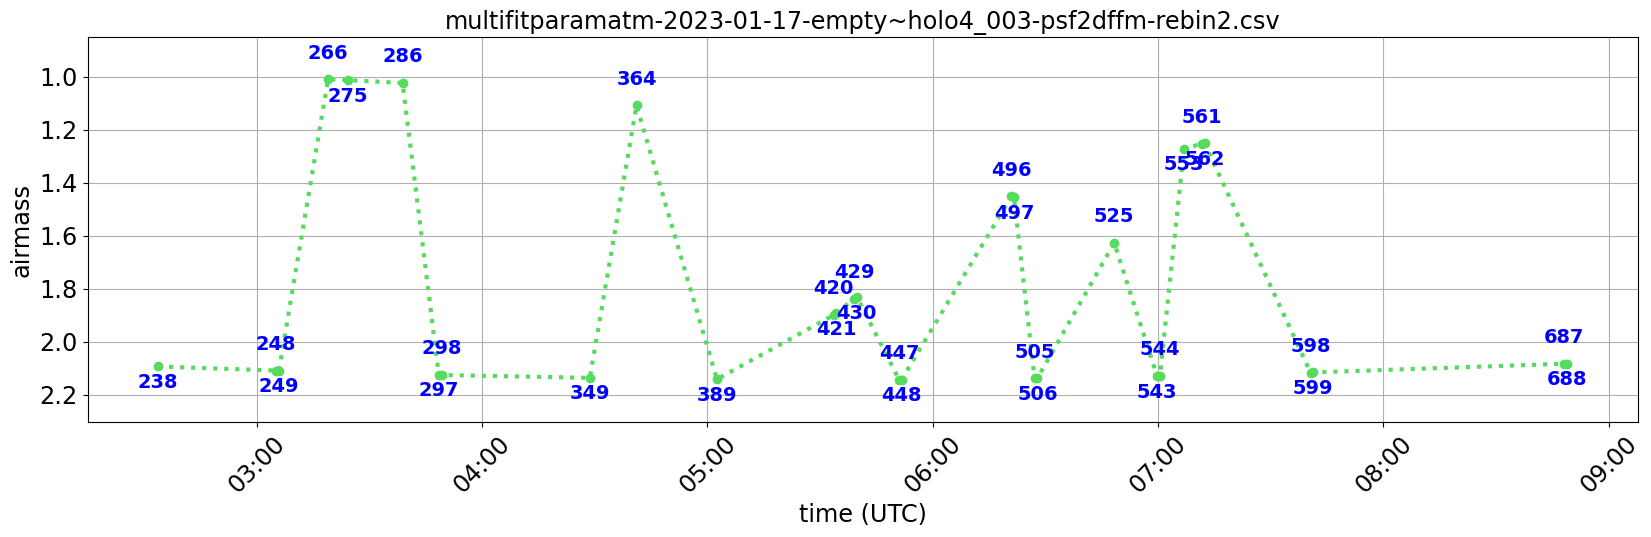

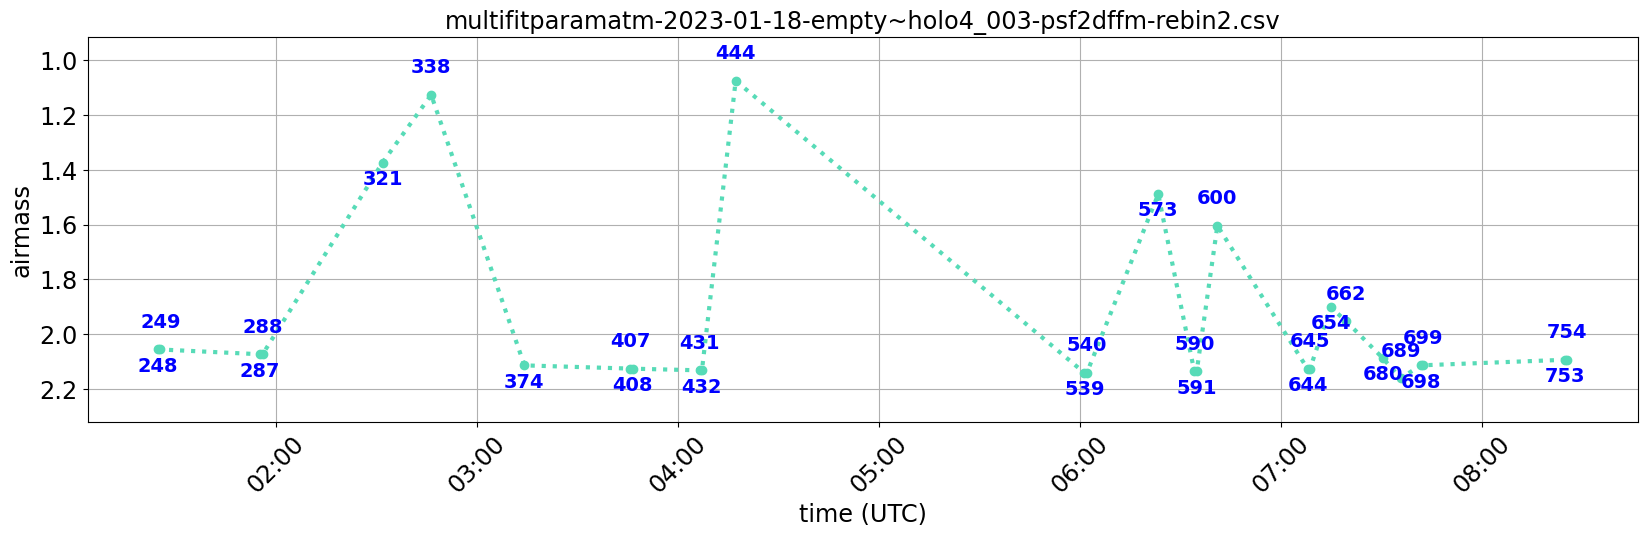

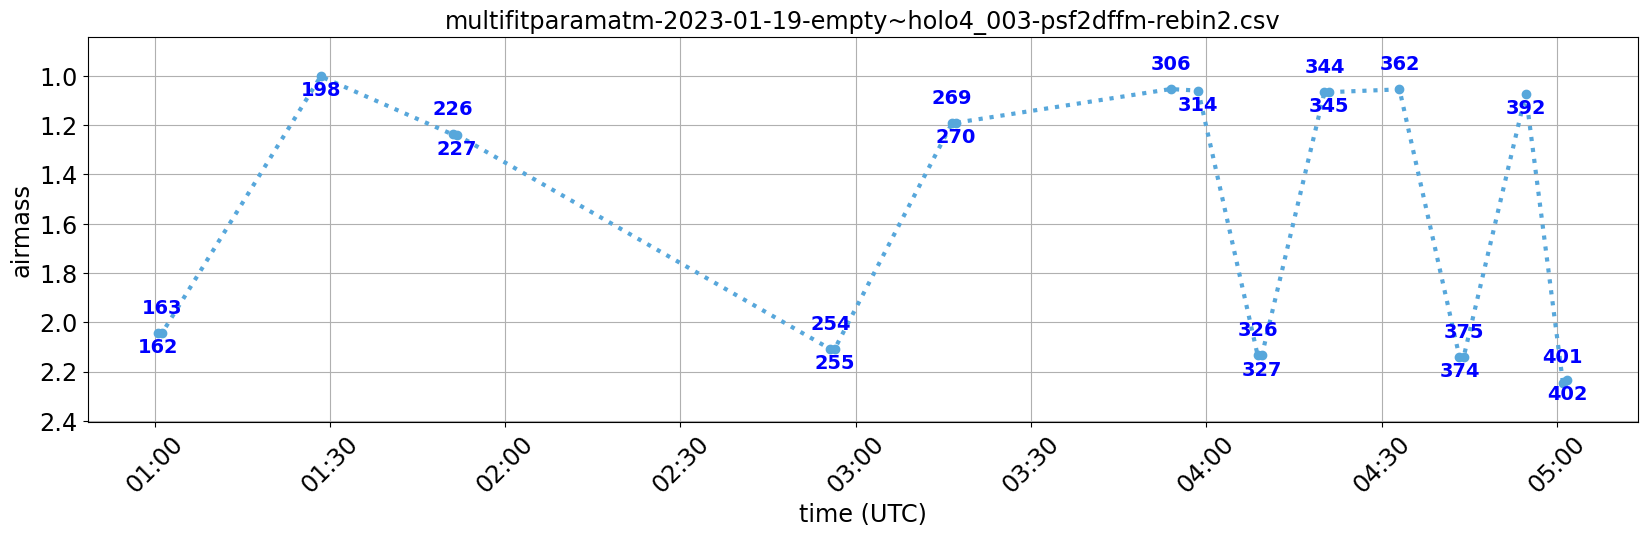

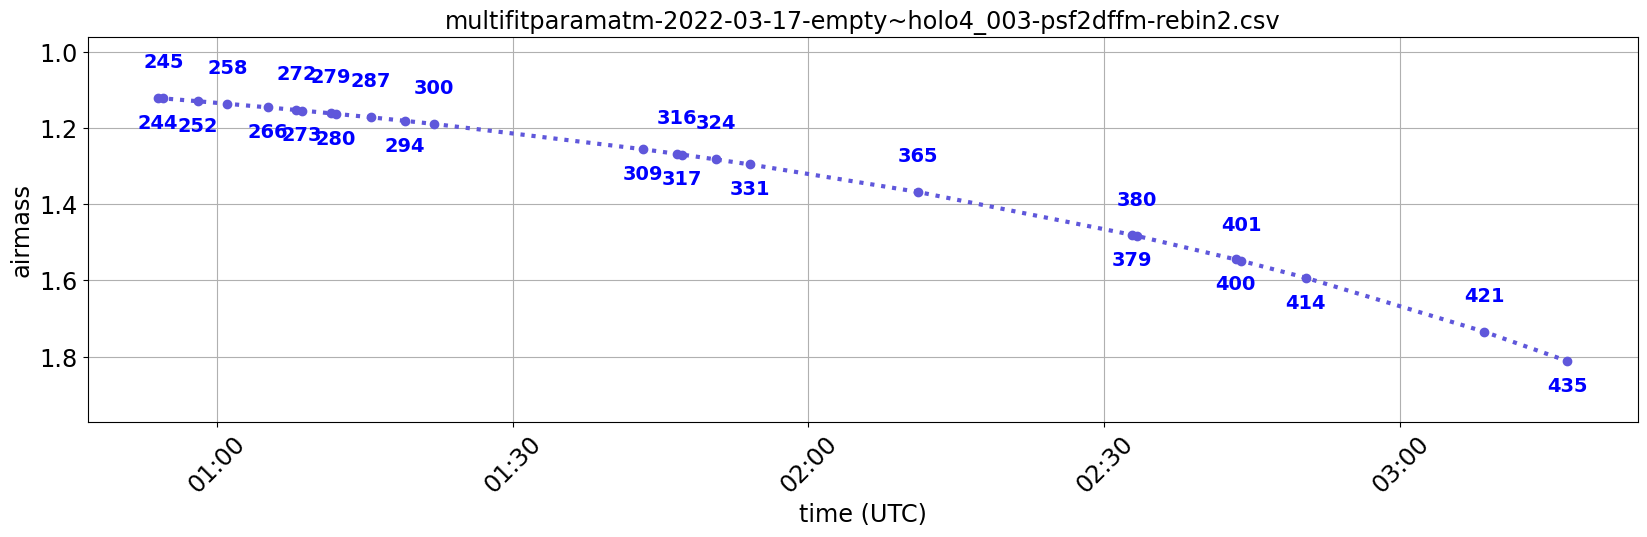

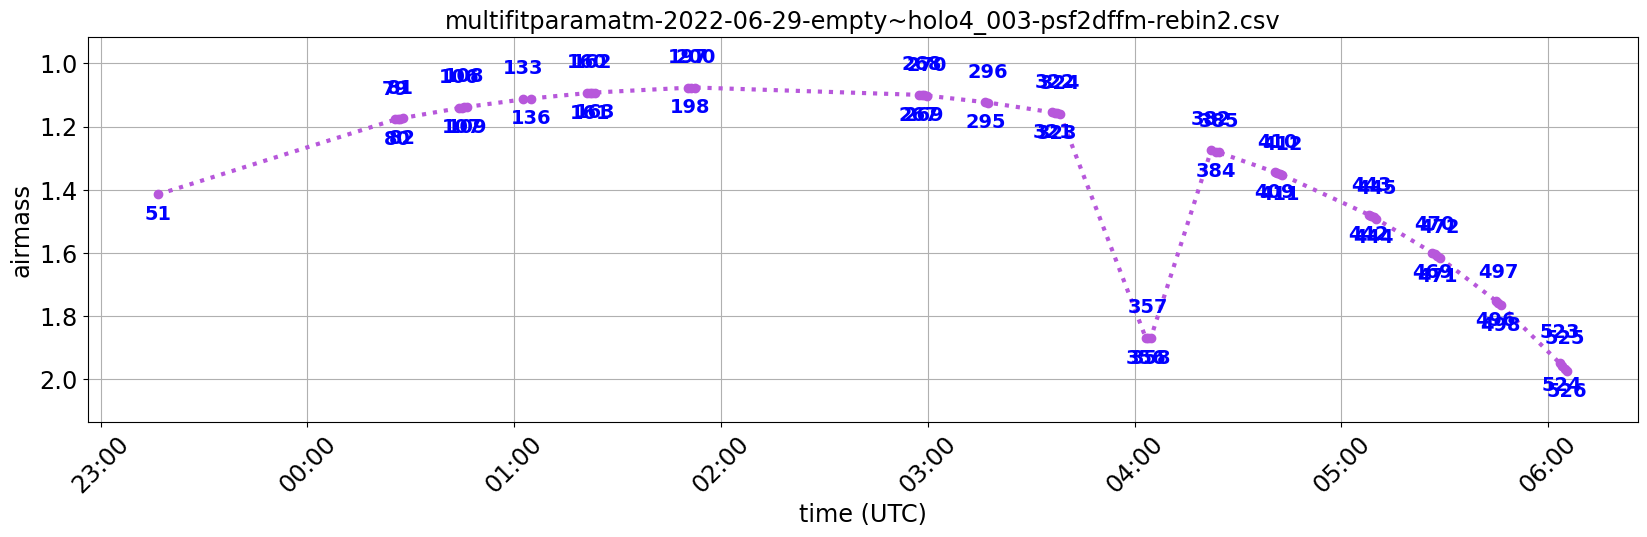

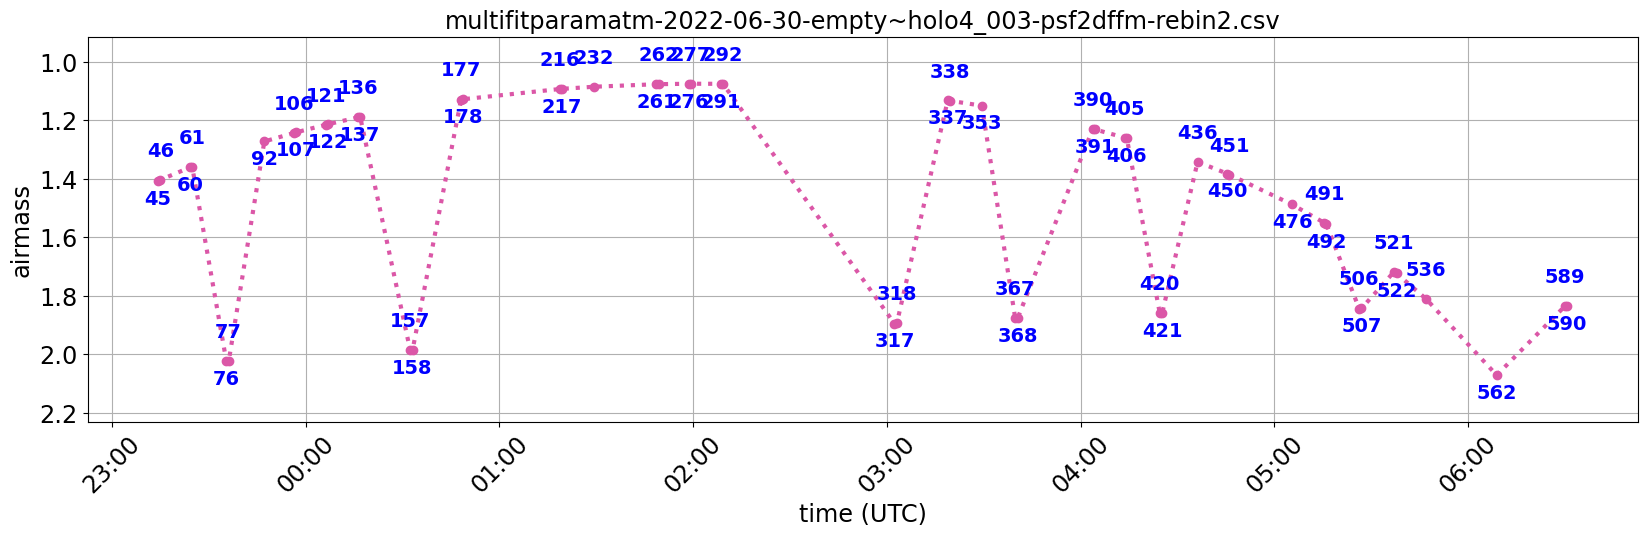

In [22]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

## Precipitable water vapor

### Plot all PWV in different figures

In [23]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_40194/2594509097.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


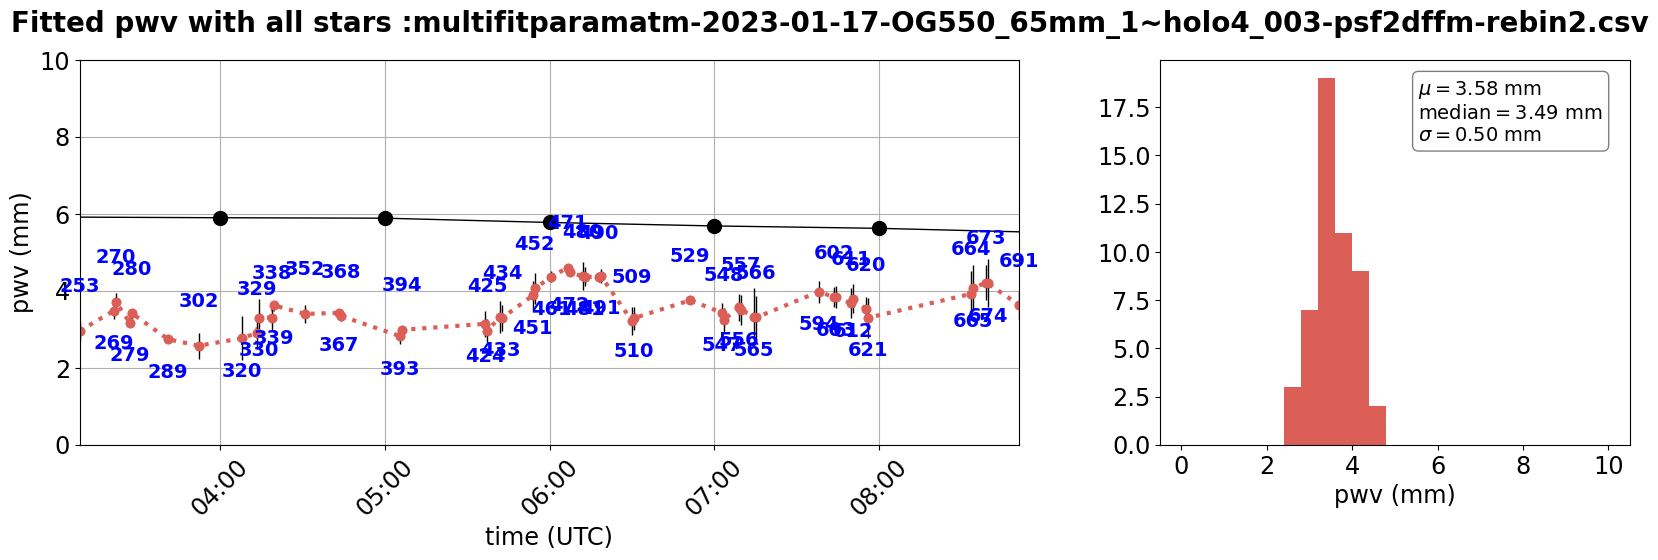

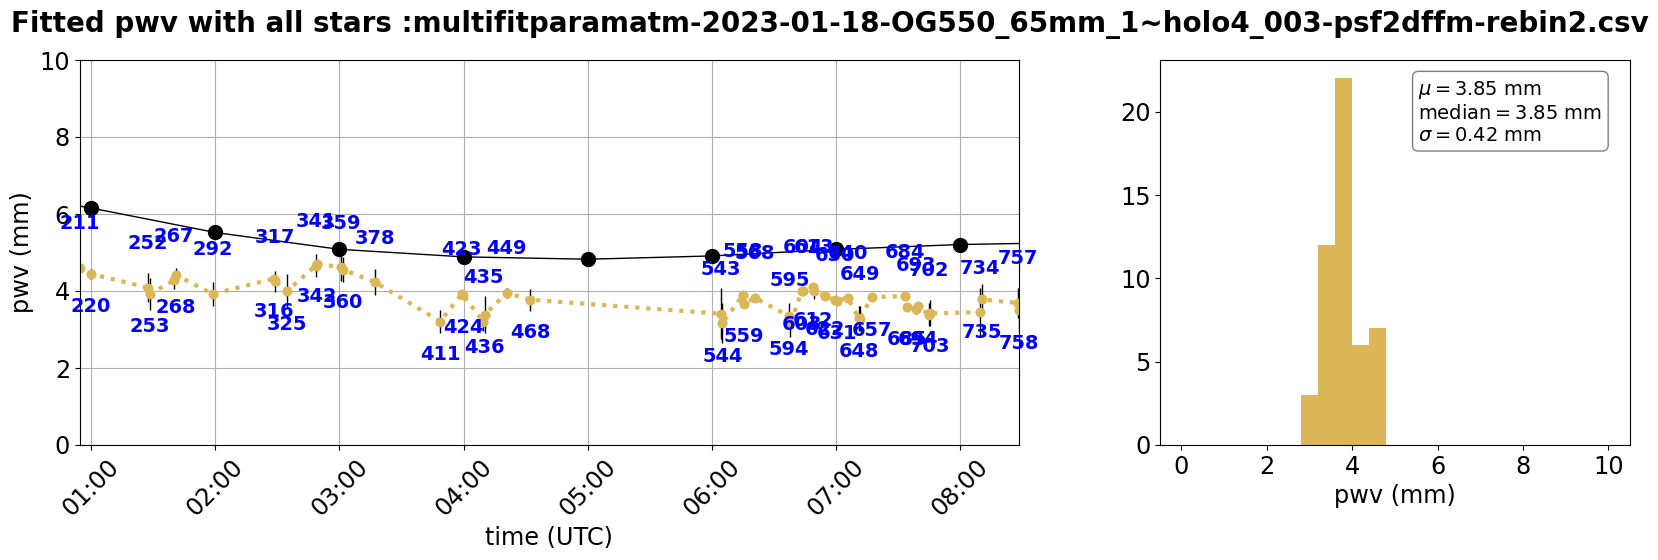

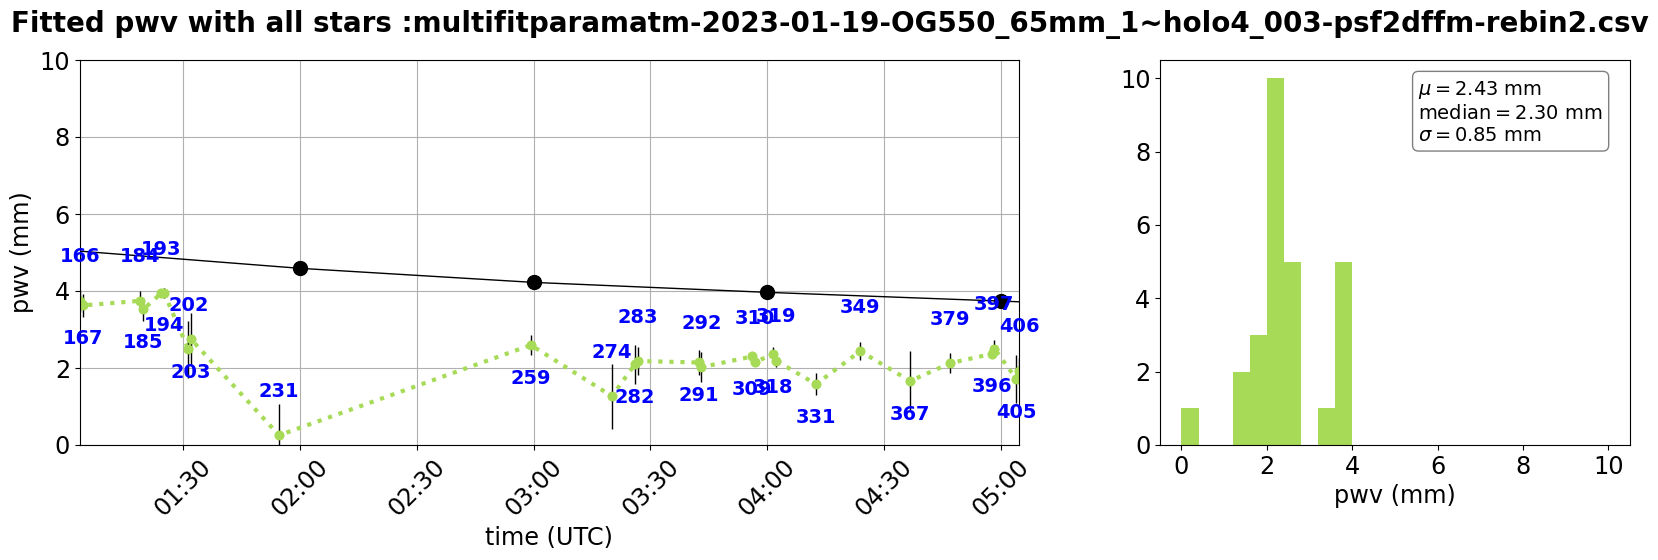

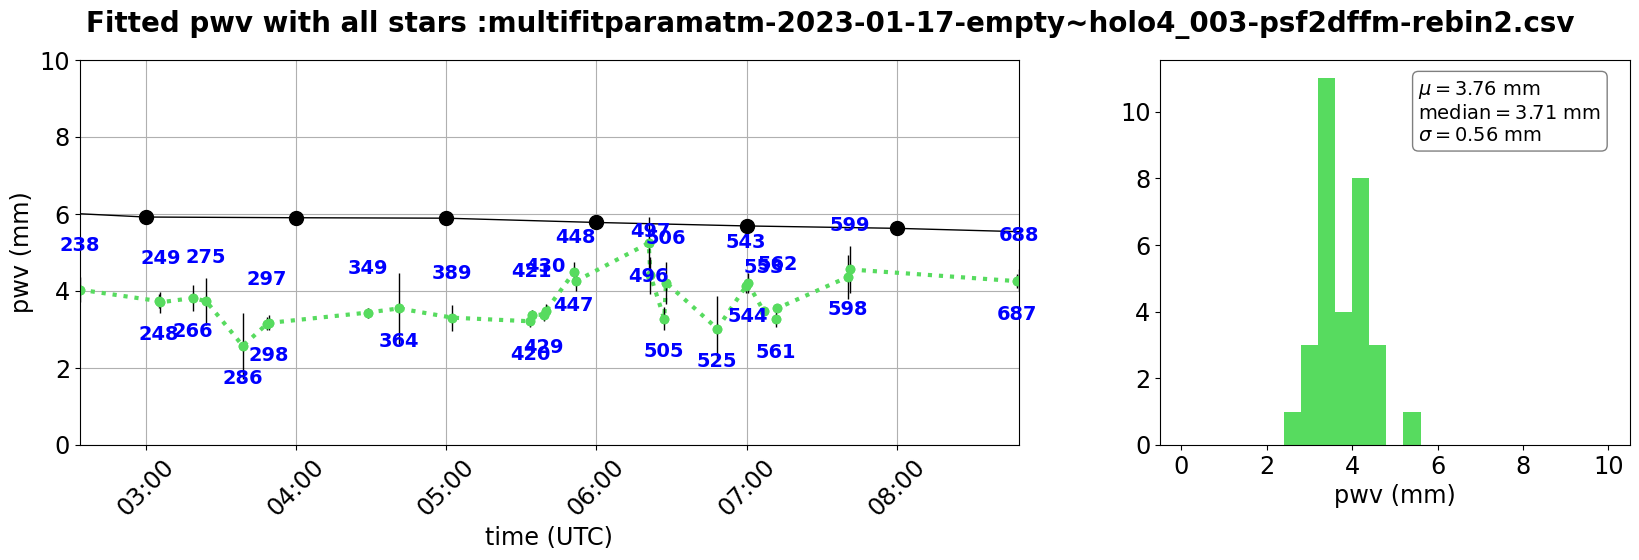

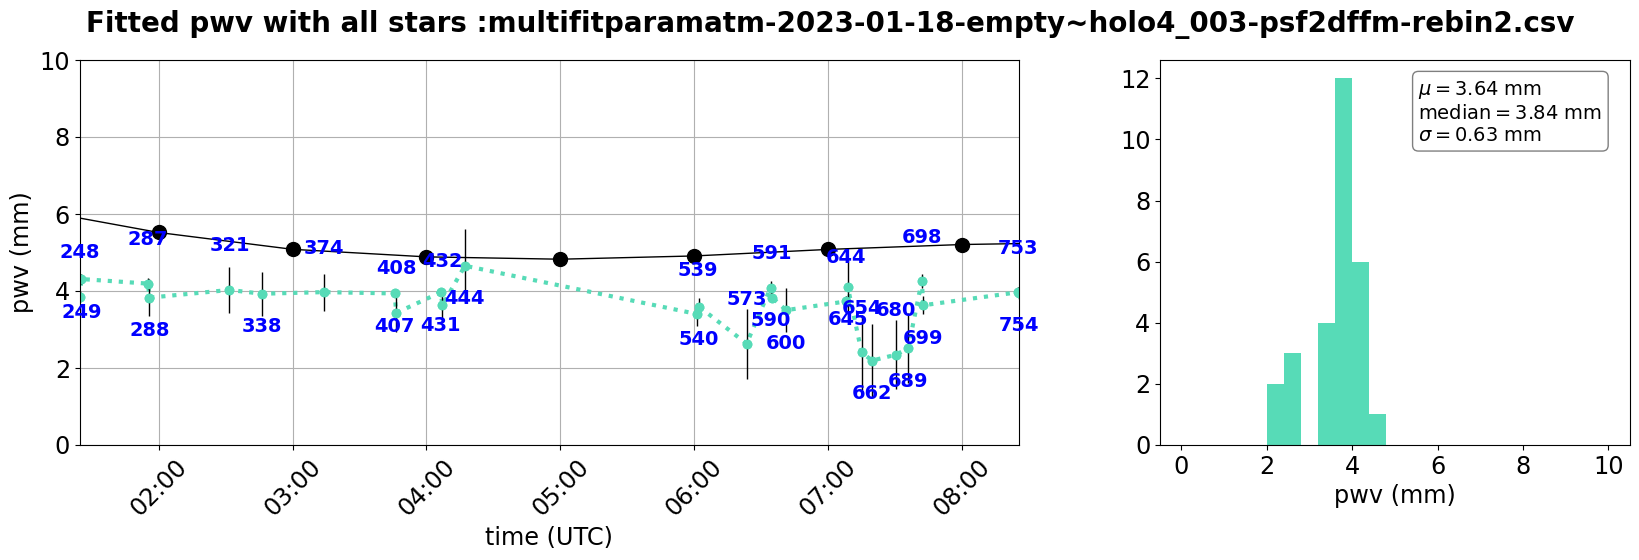

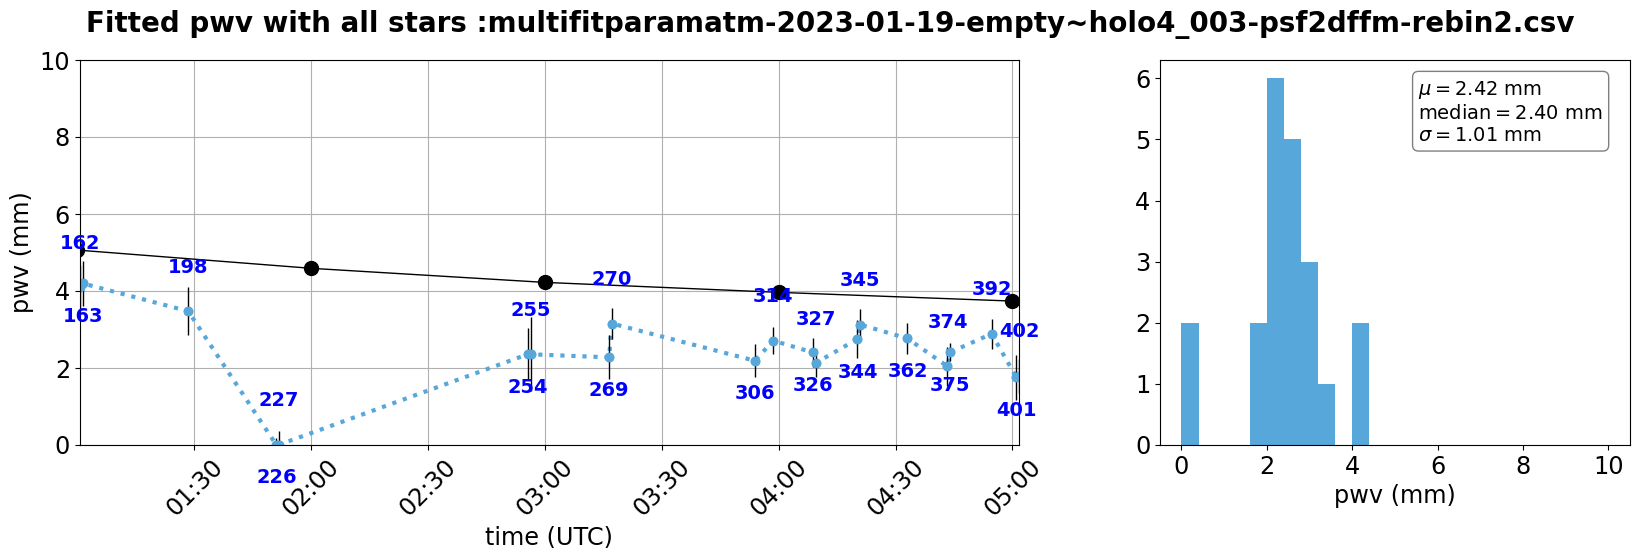

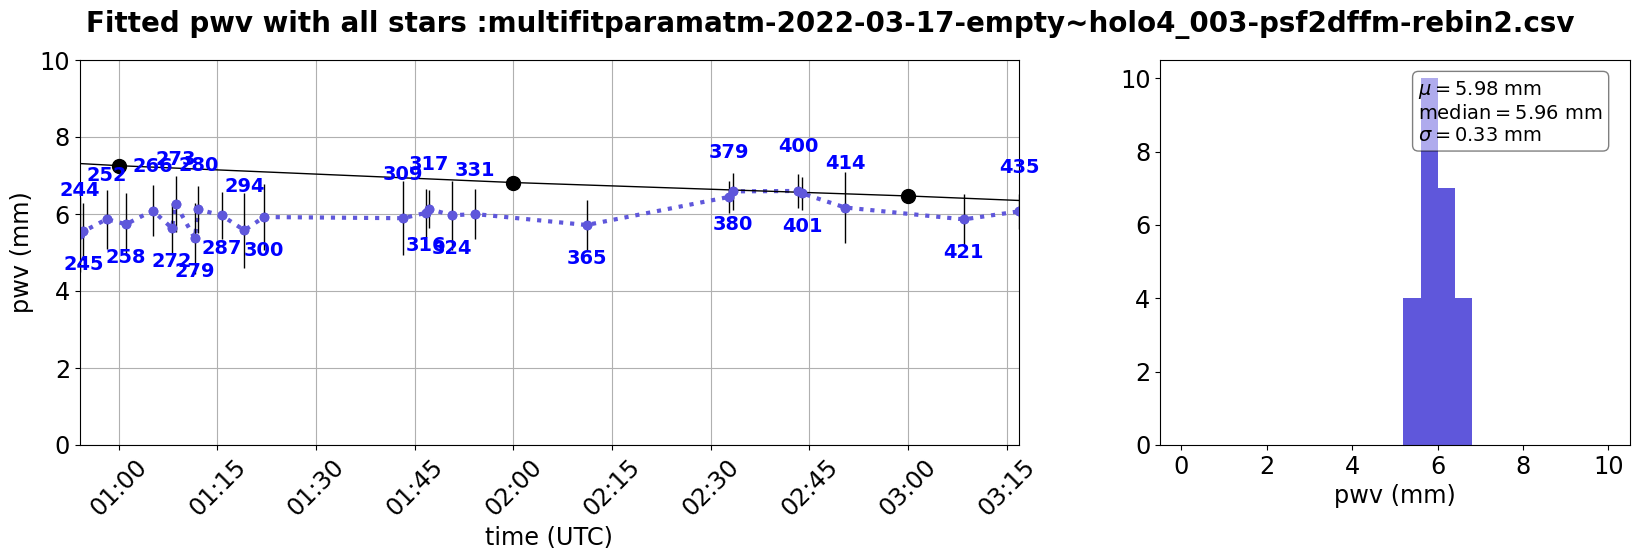

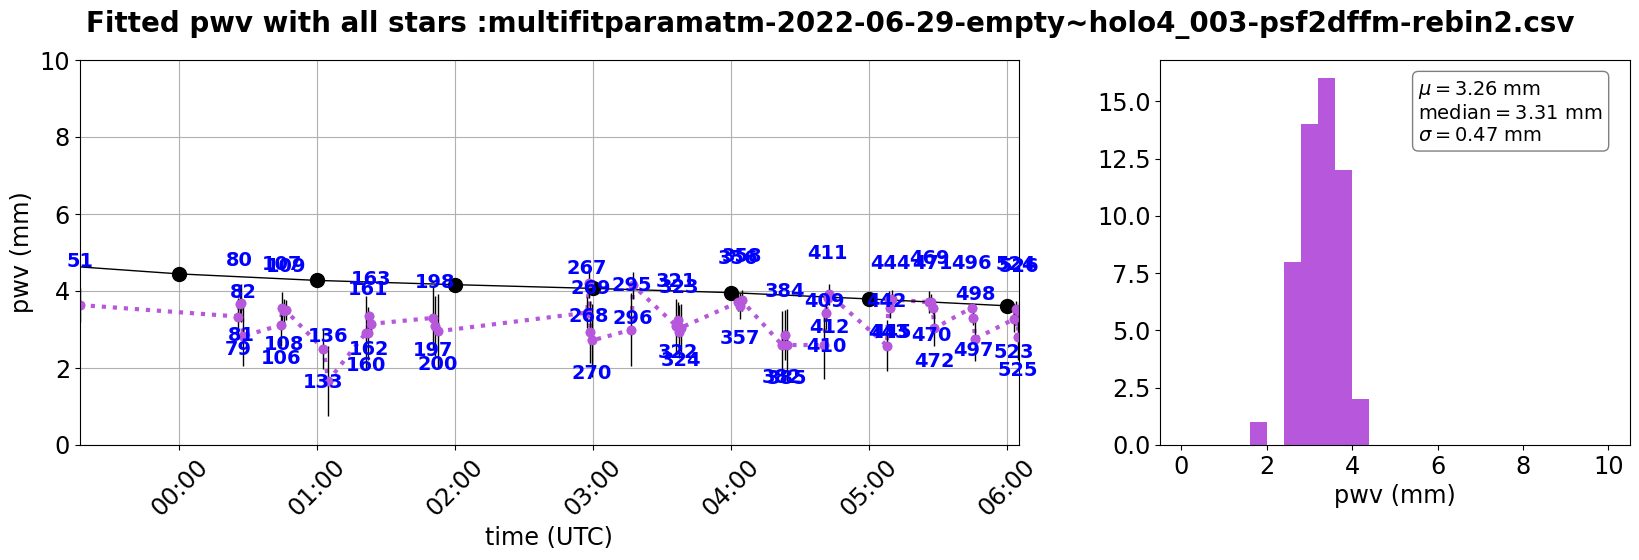

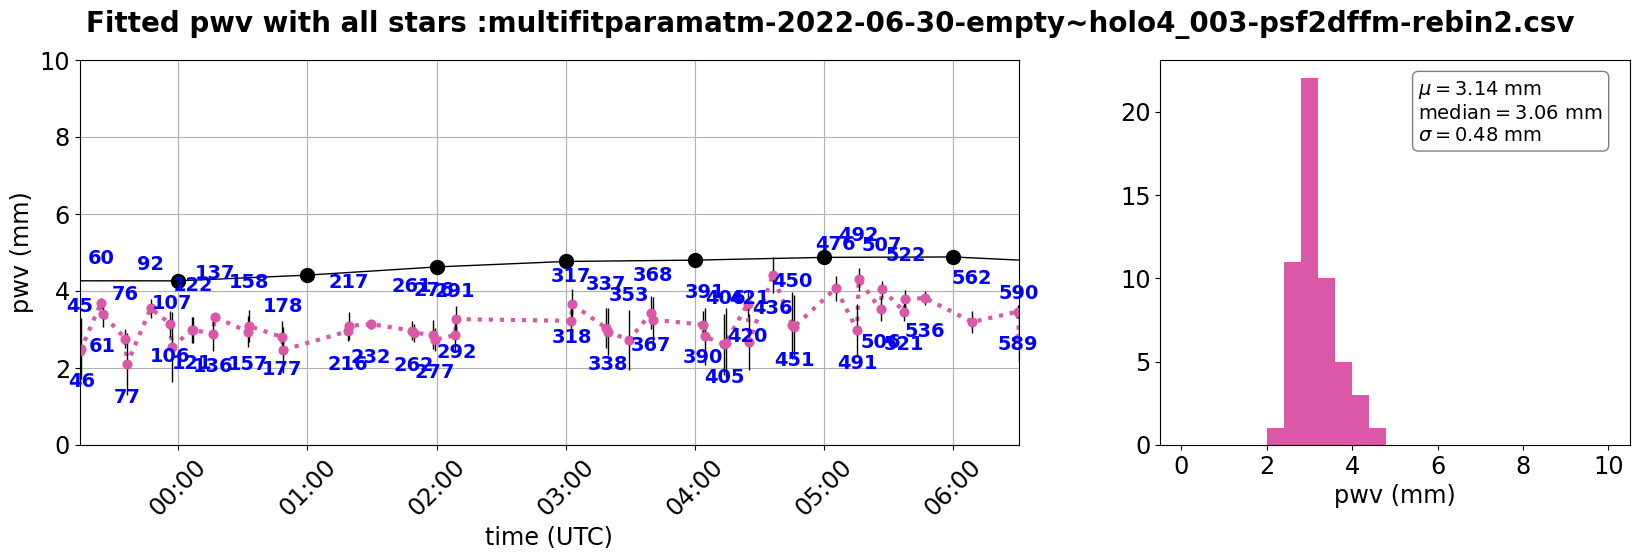

In [24]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label="merra2")
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="RERRA2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_40194/325730268.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


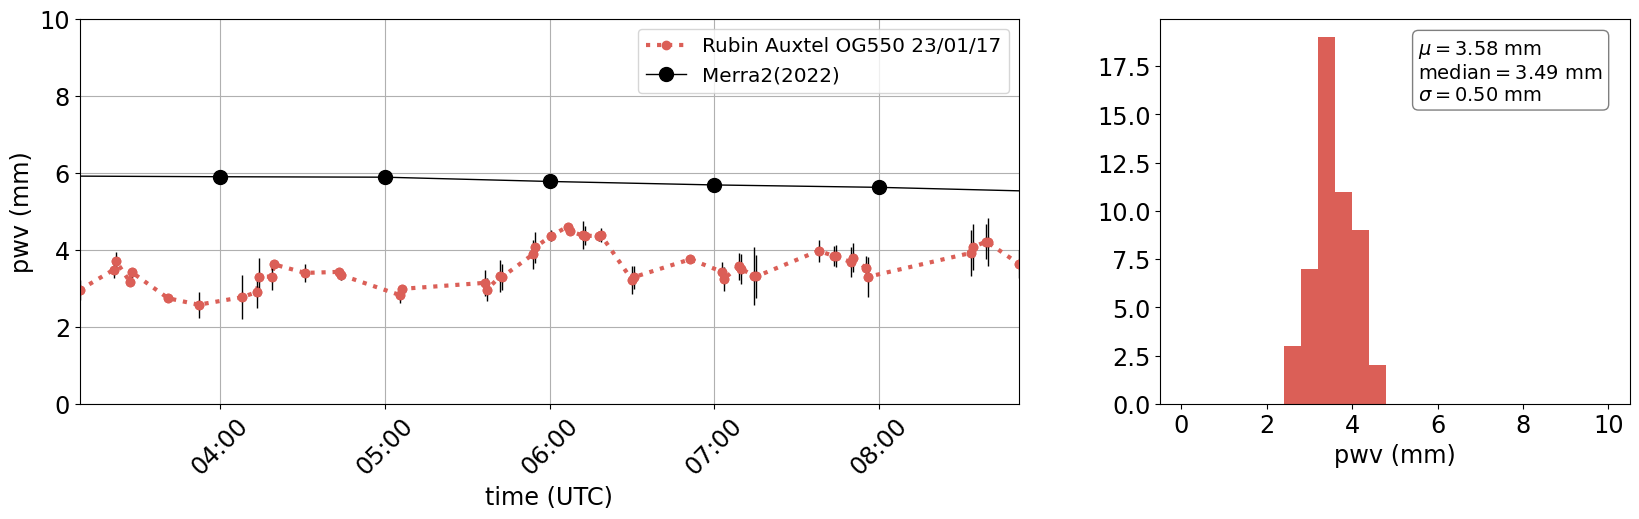

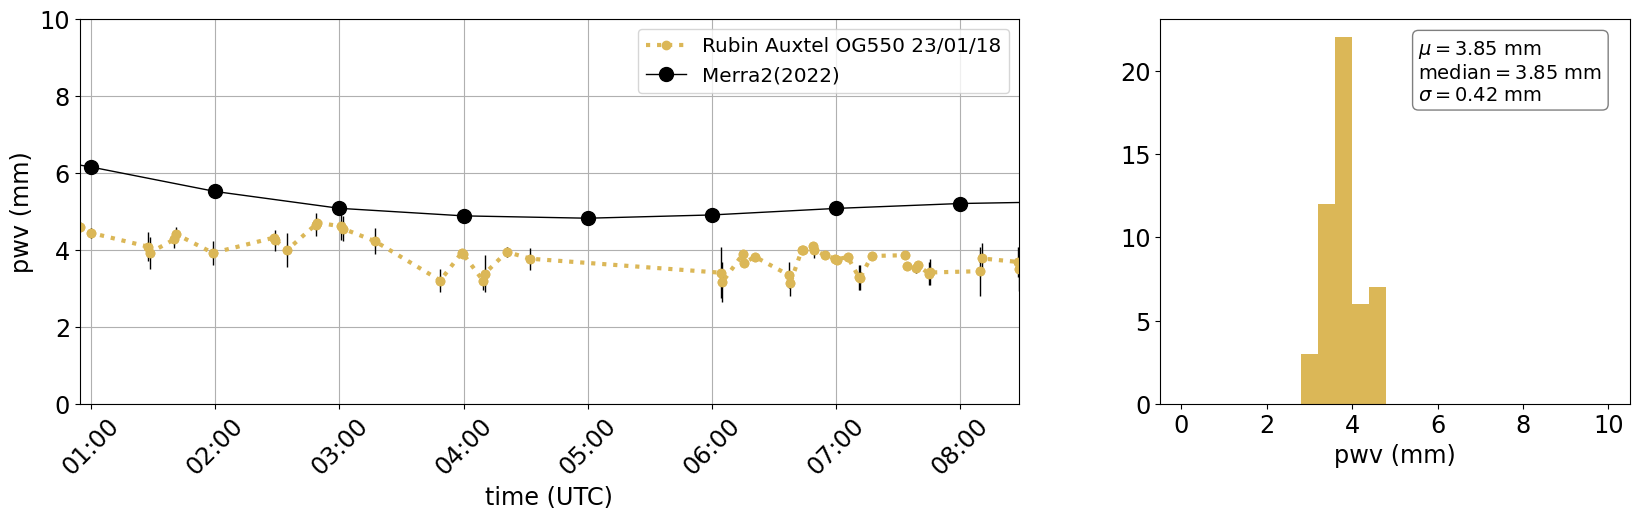

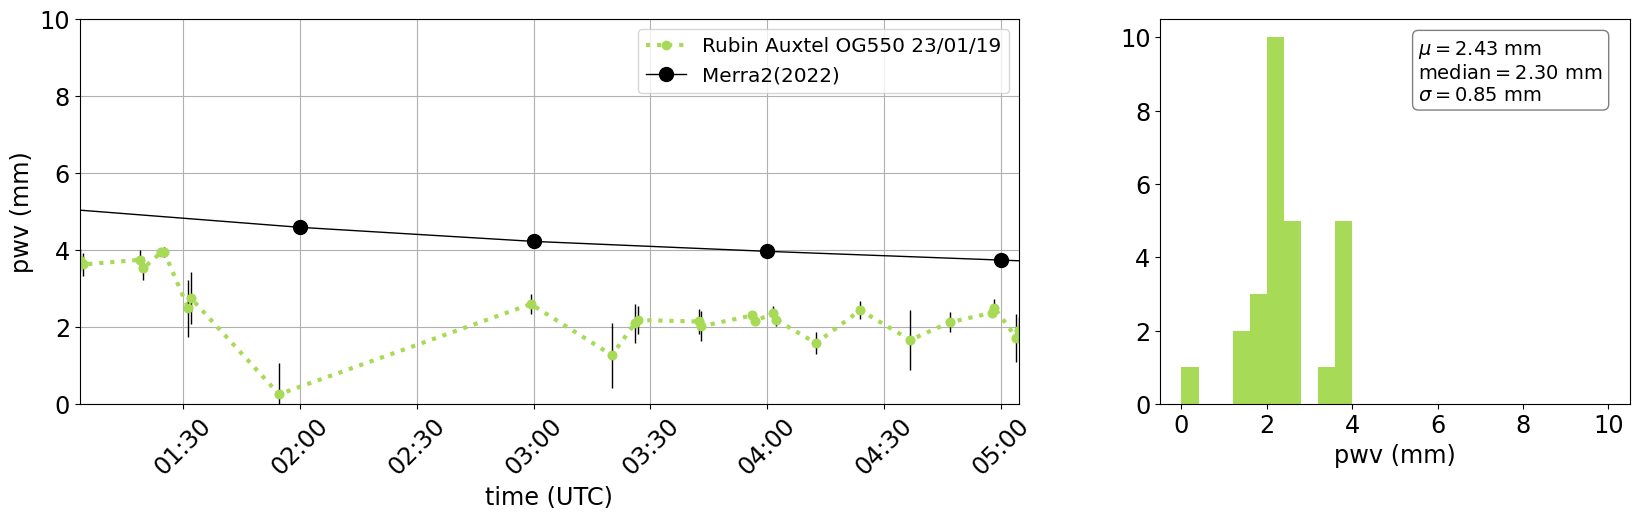

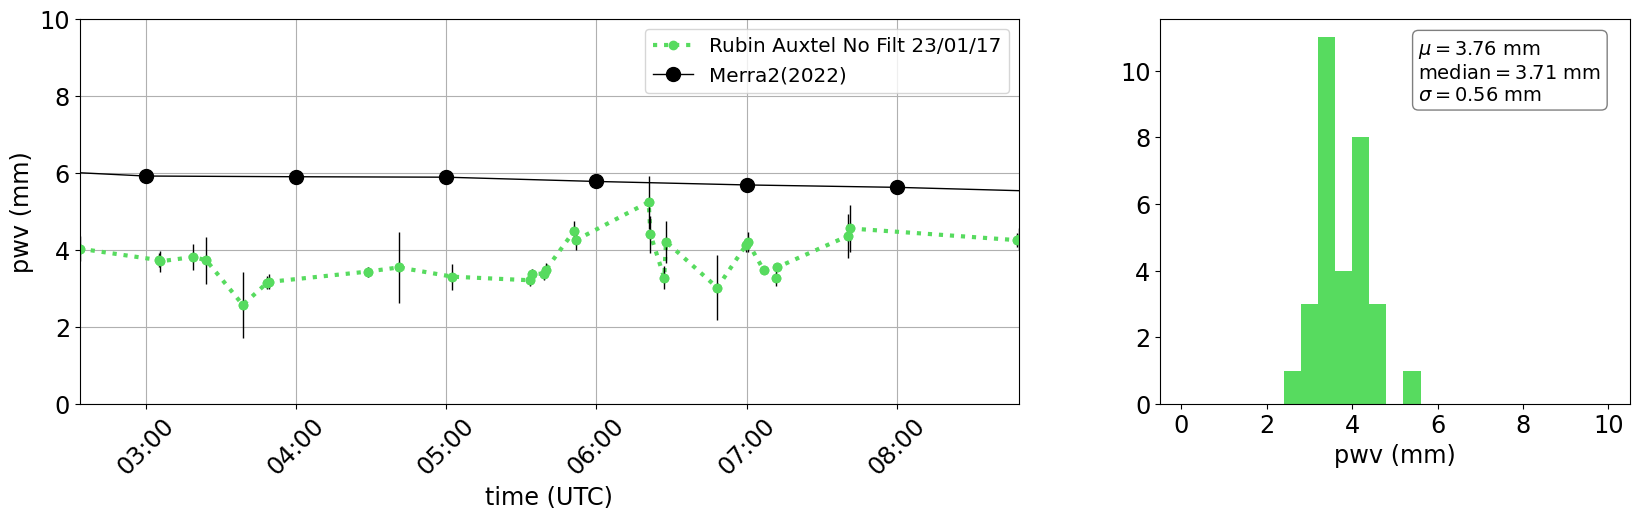

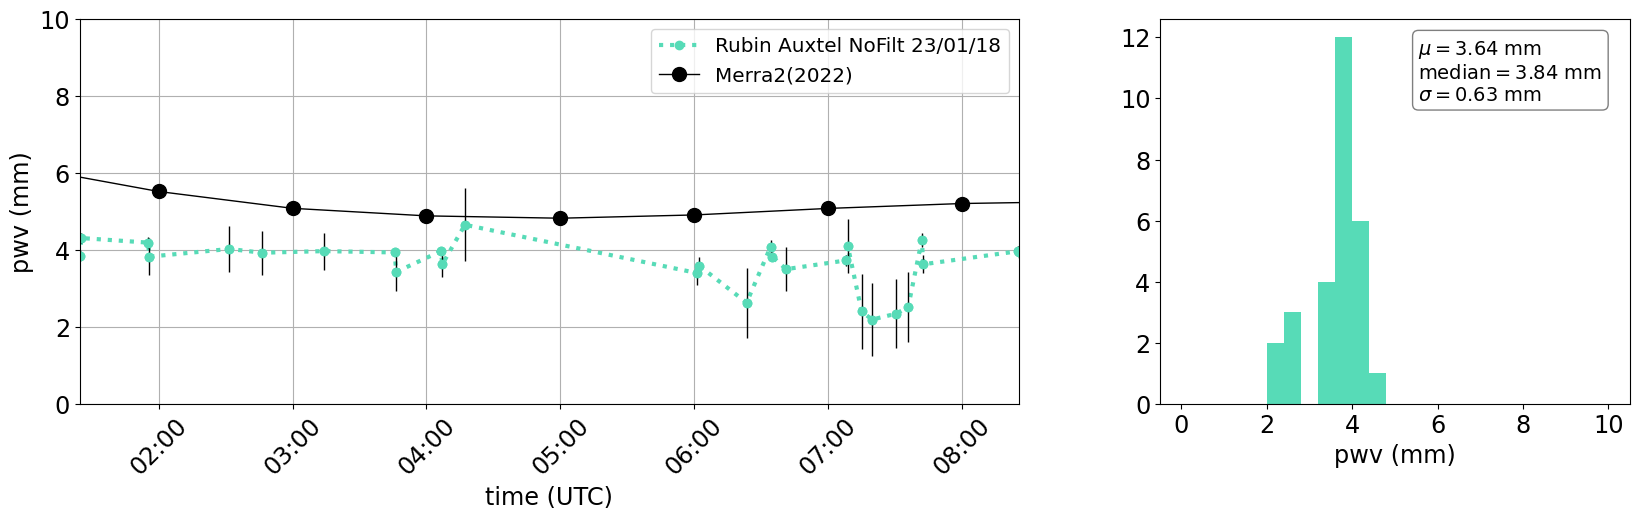

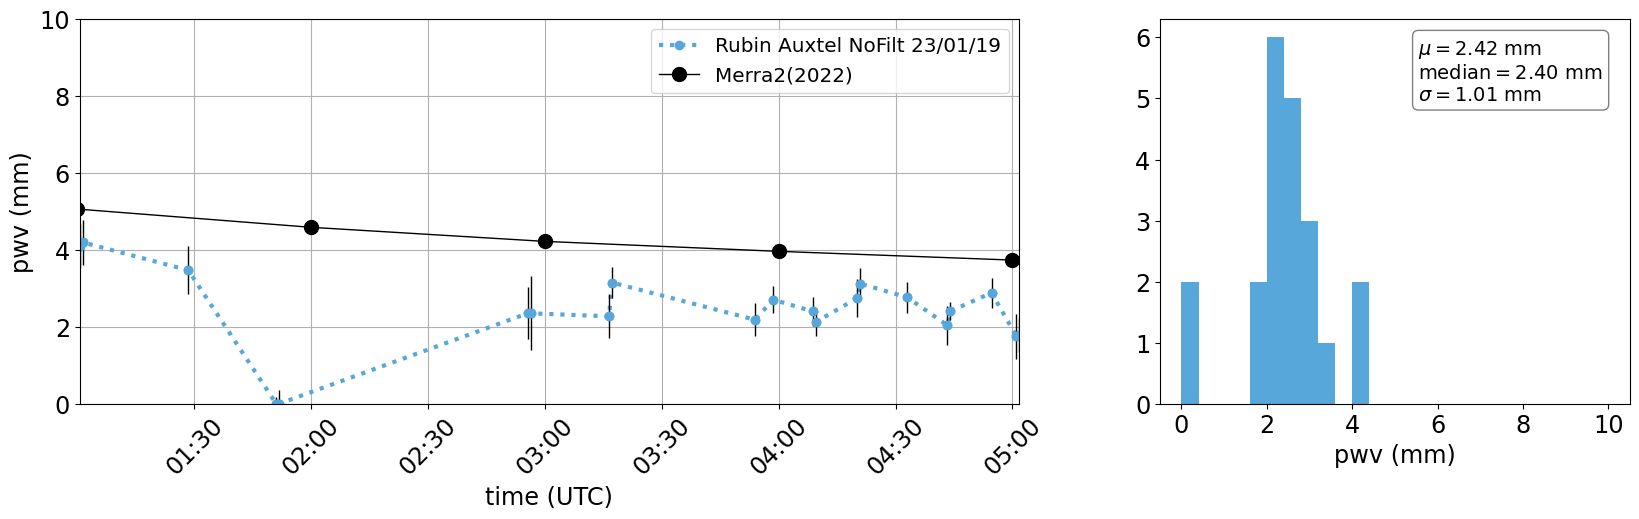

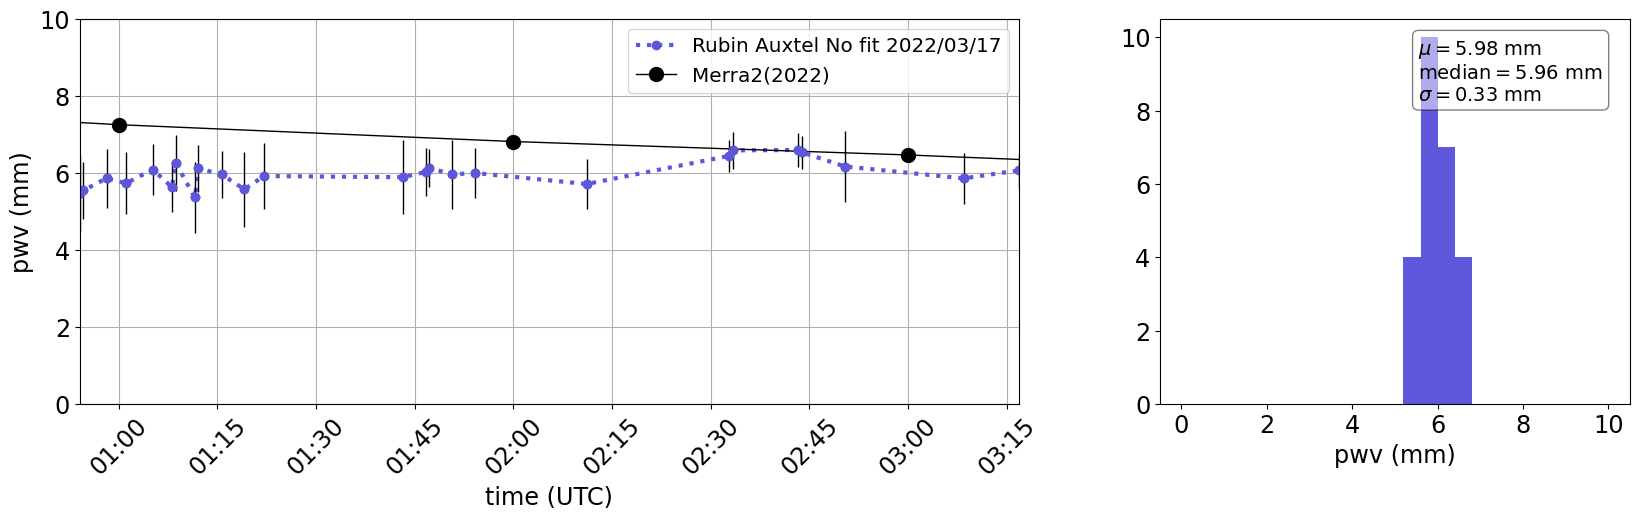

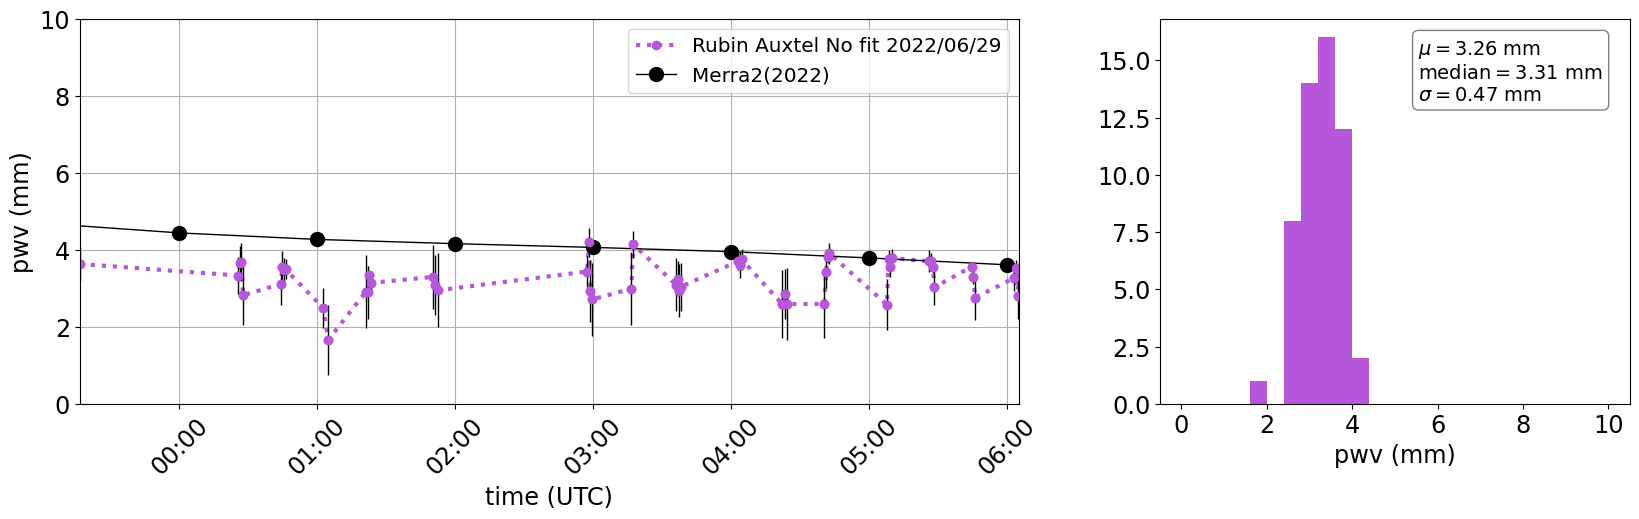

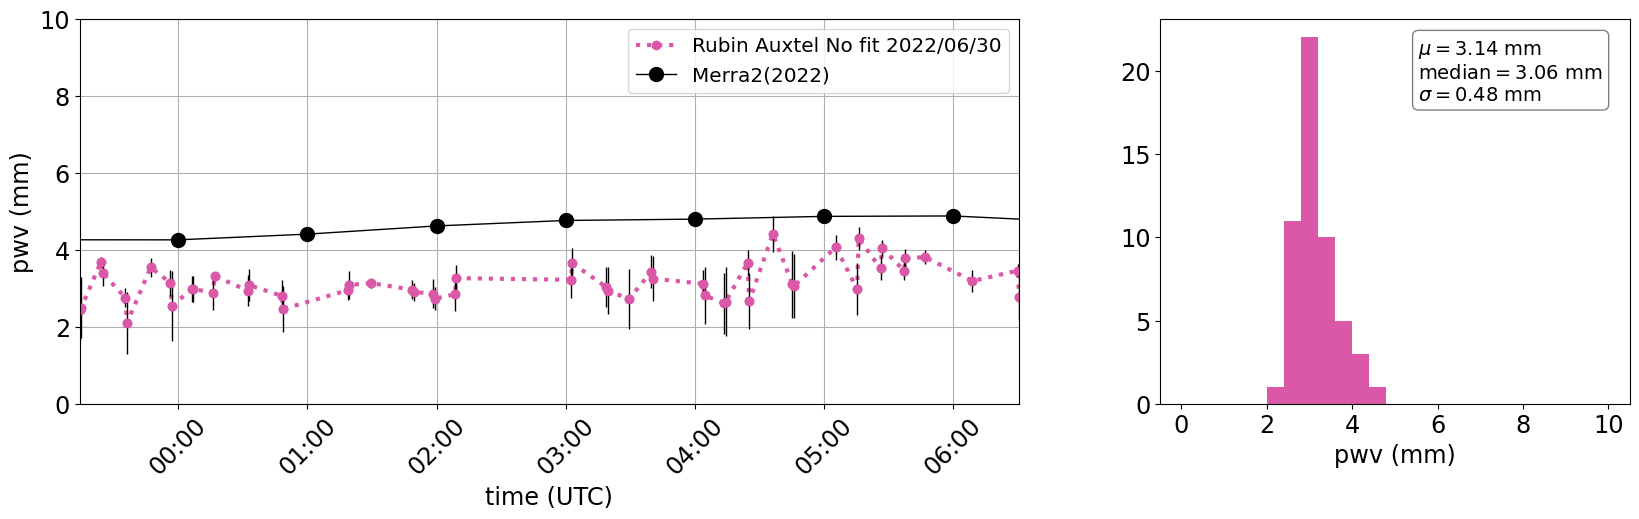

In [25]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 



  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.legend()

    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted pwv with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

In [26]:
len(all_df)

9

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_40194/3545433848.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


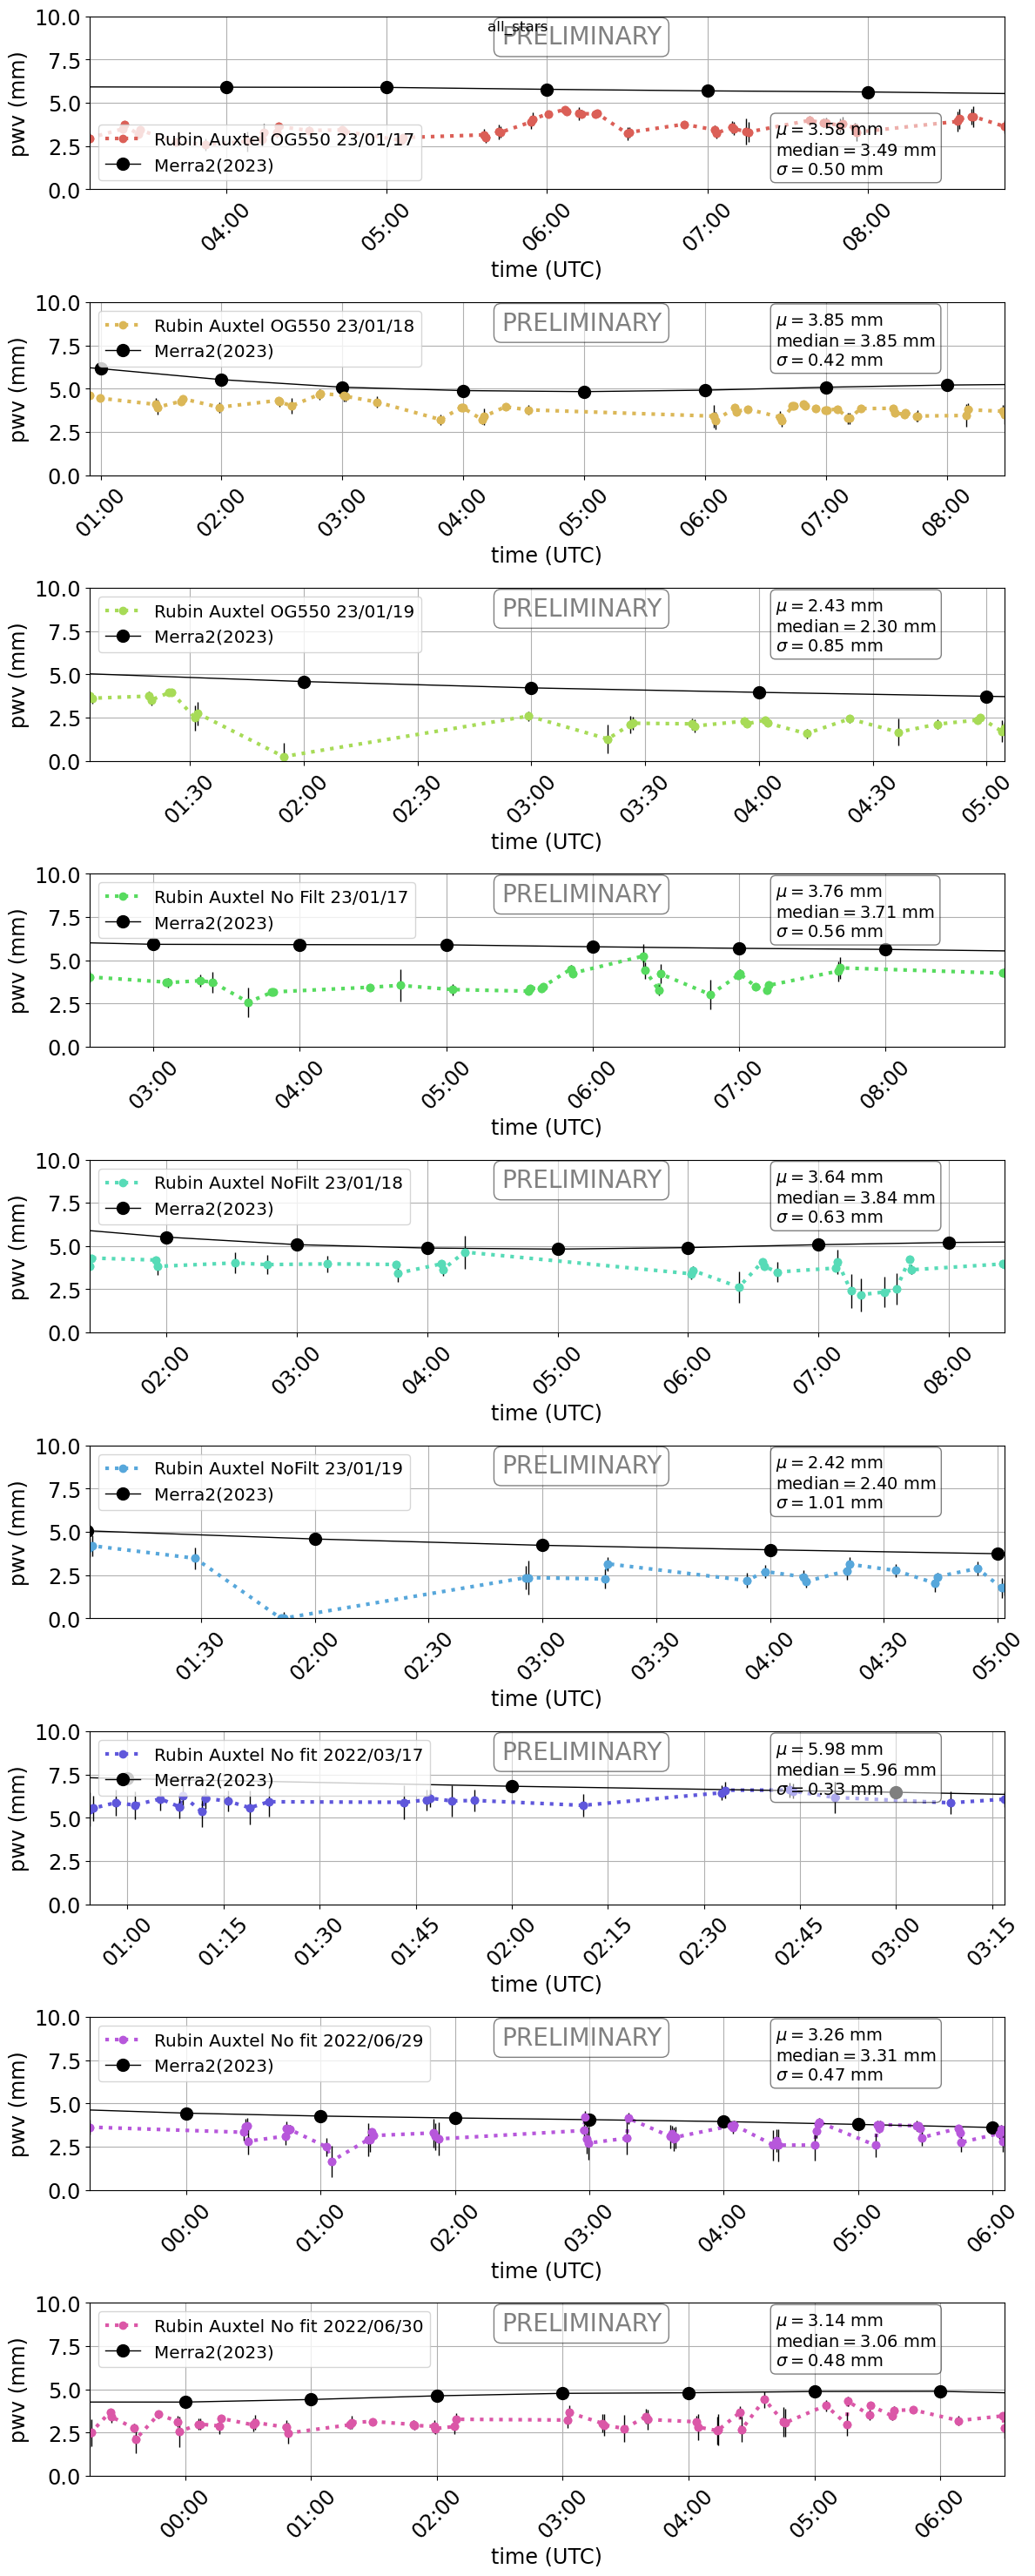

In [27]:
fig = plt.figure(figsize=(12,30))

gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,10.)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_pwv_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

# Compute average per night

## PWV

In [28]:
all_nights_pwvauxtel = np.zeros((len(all_df),3))
all_nights_pwvmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    all_night_N[idx] = len(infos) 
    all_labels.append(tags[idx])
    
    if len(infos) == 0:
        all_nights_pwvauxtel[idx,0] = np.nan
        all_nights_pwvauxtel[idx,1] = np.nan
        all_nights_pwvauxtel[idx,2] = np.nan
        
        all_nights_pwvmerra2[idx,0] = np.nan
        all_nights_pwvmerra2[idx,1] = np.nan
        all_nights_pwvmerra2[idx,2] = np.nan
        
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    all_nights_pwvauxtel[idx,0] = mu
    all_nights_pwvauxtel[idx,1] = median
    all_nights_pwvauxtel[idx,2] = sigma
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_pwv_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_pwv_merra2.append(pwv_merra2.iloc[idx_m2]) 
        
    night_pwv_merra2=np.array(night_pwv_merra2)
    
    mu_m = night_pwv_merra2.mean()
    median_m = np.median(night_pwv_merra2)
    sigma_m =night_pwv_merra2.std()
    
    all_nights_pwvmerra2[idx,0] = mu_m
    all_nights_pwvmerra2[idx,1] = median_m
    all_nights_pwvmerra2[idx,2] = sigma_m
    
    

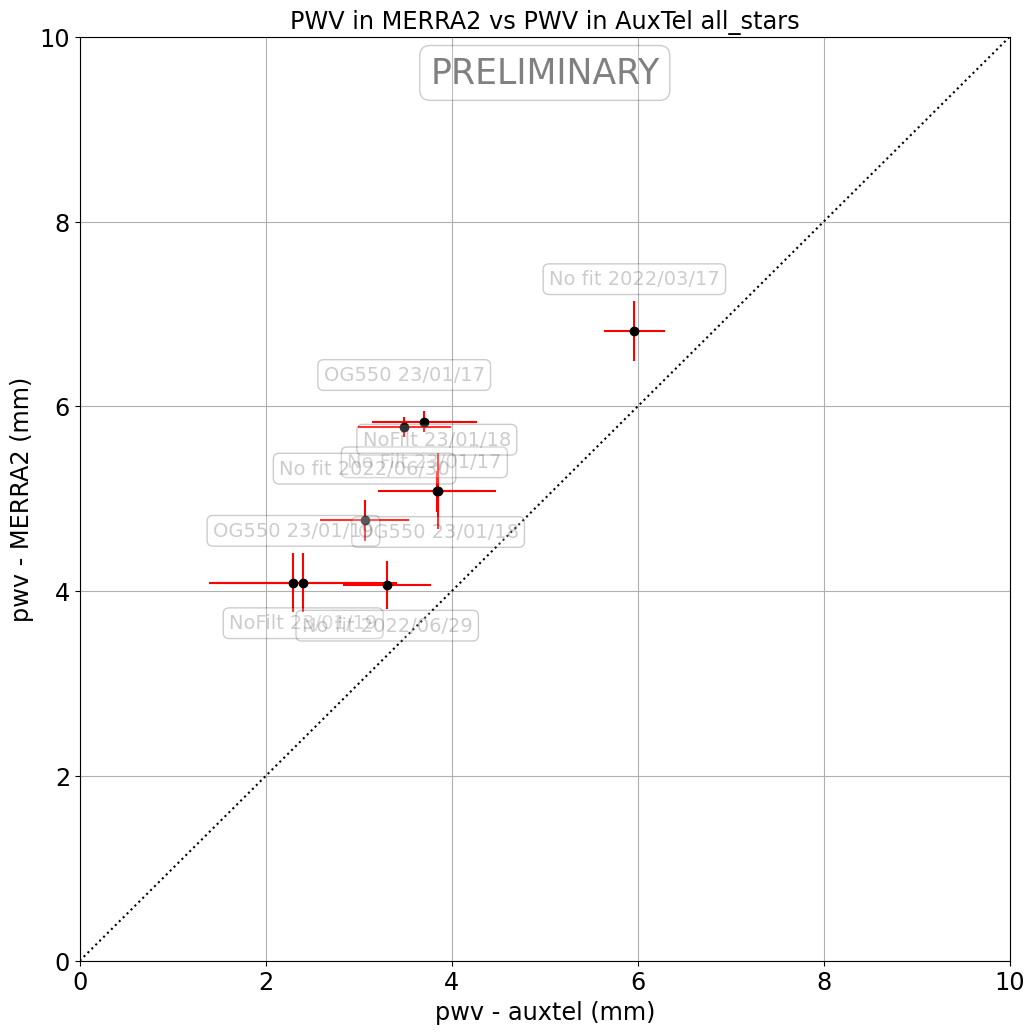

In [29]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_pwvauxtel[:,1],all_nights_pwvmerra2[:,1],xerr=all_nights_pwvauxtel[:,2], yerr=all_nights_pwvmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title(f"PWV in MERRA2 vs PWV in AuxTel {tag_stars}")
ax.set_xlabel("pwv - auxtel (mm)")
ax.set_ylabel("pwv - MERRA2 (mm)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_pwvauxtel[idx,1]
    yy=all_nights_pwvmerra2[idx,1]
   
    if idx%2==0:
        yy+=0.5
    else:
        yy-=0.5
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=0.2)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

ax.grid()
figname = f"fig_pwvm2vspwvaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()

## Ozone

In [30]:
all_nights_ozauxtel = np.zeros((len(all_df),3))
all_nights_ozmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    
    all_labels.append(tags[idx])
    
    if len(infos) == 0 or idx<=2 :
        all_nights_ozauxtel[idx,0] = np.nan
        all_nights_ozauxtel[idx,1] = np.nan
        all_nights_ozauxtel[idx,2] = np.nan
        
        all_nights_ozmerra2[idx,0] = np.nan
        all_nights_ozmerra2[idx,1] = np.nan
        all_nights_ozmerra2[idx,2] = np.nan
        all_night_N[idx] = len(infos) 
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    
    oz= infos['oz_1'].values
    eoz= infos['eoz_1'].values
    
    
    
    mu = oz.mean()
    median = np.median(oz)
    sigma =oz.std()
    
    all_nights_ozauxtel[idx,0] = mu
    all_nights_ozauxtel[idx,1] = median
    all_nights_ozauxtel[idx,2] = sigma
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_oz_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_oz_merra2.append(oz_merra2.iloc[idx_m2]) 
        
    night_oz_merra2=np.array(night_oz_merra2)
    
    mu_m = night_oz_merra2.mean()
    median_m = np.median(night_oz_merra2)
    sigma_m =night_oz_merra2.std()
    
    all_nights_ozmerra2[idx,0] = mu_m
    all_nights_ozmerra2[idx,1] = median_m
    all_nights_ozmerra2[idx,2] = sigma_m
    
    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


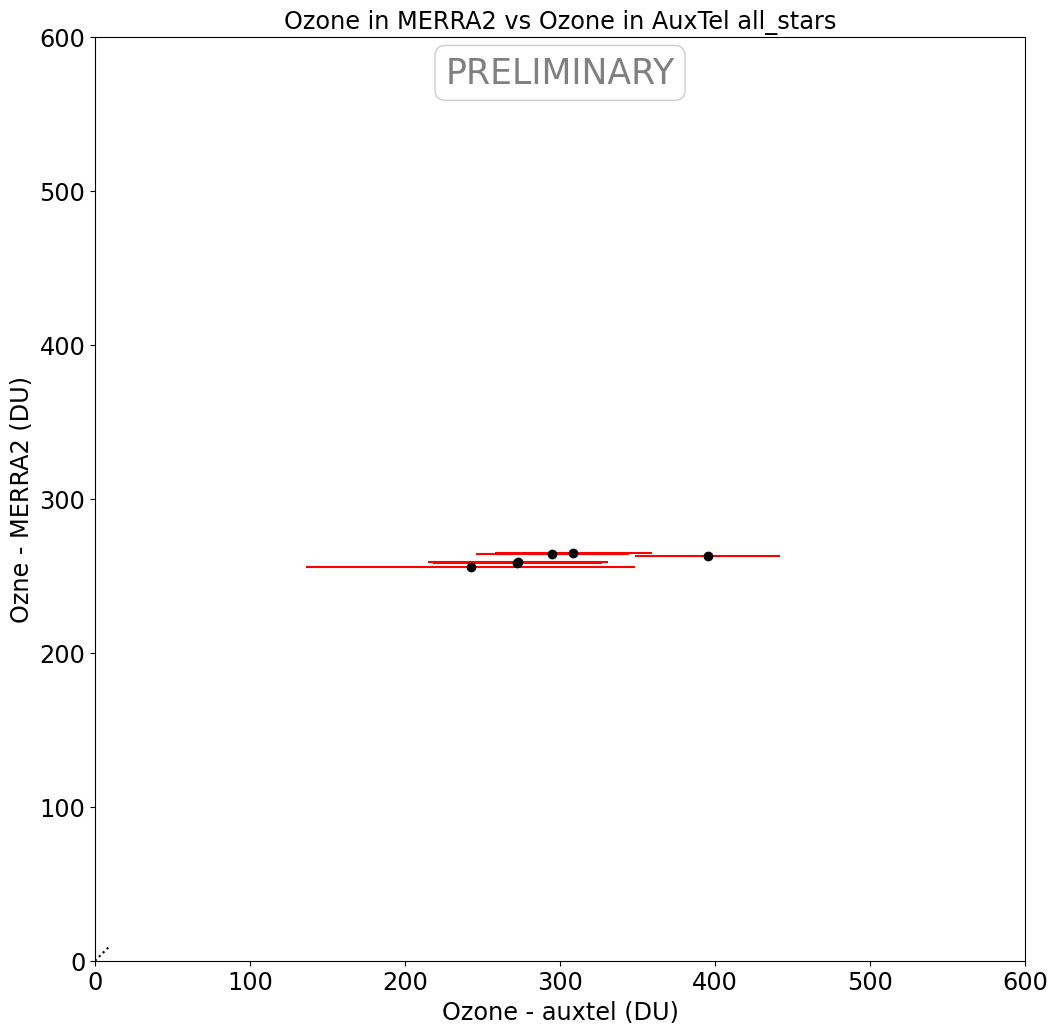

In [31]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_ozauxtel[:,1],all_nights_ozmerra2[:,1],xerr=all_nights_ozauxtel[:,2], yerr=all_nights_ozmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_title(f"Ozone in MERRA2 vs Ozone in AuxTel {tag_stars}")
ax.set_xlabel("Ozone - auxtel (DU)")
ax.set_ylabel("Ozne - MERRA2 (DU)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_ozauxtel[idx,1]
    yy=all_nights_ozmerra2[idx,1]
   
    if idx%2==0:
        yy+=50
    else:
        yy-=50
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=0.2)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

plt.grid()

ax.grid()
figname = f"fig_ozm2vsozaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()